<a href="https://colab.research.google.com/github/RedForOne/cs230-code-examples/blob/master/expedia_ranking_assignment_randomforestclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 





In [9]:
train = pd.read_csv("training_set_VU_DM.csv") 


print(train.head())
# we can see that there are a lot of non existing numeric values  
#these values are more of non existing or empty values 
# we convert it to a numerical value 

   srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  ...  comp6_rate_percent_diff  \
0                3   

In [10]:
# checking for empty values

train.isnull().any(axis=1) 




0        True
1        True
2        True
3        True
4        True
         ... 
78489    True
78490    True
78491    True
78492    True
78493    True
Length: 78494, dtype: bool

In [11]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [12]:
train.isnull()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
2,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
3,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
4,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78489,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,True,True,False,True,False
78490,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,True,True,False,True,False
78491,False,False,False,False,True,True,False,False,False,False,...,True,False,False,True,True,True,True,False,True,False
78492,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False


In [13]:

missing_values = train.isnull().sum()  
print(missing_values[missing_values > 0])
      

visitor_hist_starrating      74114
visitor_hist_adr_usd         74114
prop_review_score              115
prop_location_score1             1
prop_location_score2         17248
prop_log_historical_price        1
position                         1
price_usd                        1
promotion_flag                   1
srch_destination_id              1
srch_length_of_stay              1
srch_booking_window              1
srch_adults_count                1
srch_children_count              1
srch_room_count                  1
srch_saturday_night_bool         1
srch_query_affinity_score    73473
orig_destination_distance    24962
random_bool                      1
comp1_rate                   76653
comp1_inv                    76512
comp1_rate_percent_diff      77008
comp2_rate                   46598
comp2_inv                    45045
comp2_rate_percent_diff      69687
comp3_rate                   54268
comp3_inv                    52382
comp3_rate_percent_diff      71080
comp4_rate          

In [14]:
train.describe(include = 'all')


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,78494.000000,78494,78494.000000,78494.000000,4380.000000,4380.000000,78494.000000,78494.000000,78494.000000,78379.000000,...,1576.000000,5292.000000,5953.000000,2346.000000,30441.000000,31585.000000,9746.000000,78493.000000,2174.000000,78493.000000
unique,NaN,3170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2013-03-03 19:26:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2626.396170,NaN,9.851657,175.260173,3.422648,190.927377,173.300329,70308.903687,3.210118,3.806504,...,17.774112,0.143991,0.080128,20.904945,-0.059492,0.008137,20.607942,0.044756,388.632130,0.027697
std,1500.052959,NaN,7.603376,66.508916,0.671788,103.178210,68.900133,40613.709721,1.047771,1.017993,...,42.323078,0.582664,0.312373,61.130619,0.471642,0.203262,562.185678,0.206768,547.313151,0.164104
min,1.000000,NaN,1.000000,2.000000,1.670000,36.910000,2.000000,1.000000,0.000000,0.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,5.450000,0.000000
25%,1326.000000,NaN,5.000000,100.000000,3.000000,123.120000,100.000000,35204.000000,3.000000,3.500000,...,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,123.110000,0.000000
50%,2607.000000,NaN,5.000000,219.000000,3.500000,170.860000,219.000000,70078.000000,3.000000,4.000000,...,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,221.640000,0.000000
75%,3921.000000,NaN,14.000000,219.000000,4.000000,236.390000,219.000000,105403.000000,4.000000,4.500000,...,19.000000,1.000000,0.000000,20.000000,0.000000,0.000000,17.000000,0.000000,422.942500,0.000000


In [15]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78494 entries, 0 to 78493
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   srch_id                      78494 non-null  int64  
 1   date_time                    78494 non-null  object 
 2   site_id                      78494 non-null  int64  
 3   visitor_location_country_id  78494 non-null  int64  
 4   visitor_hist_starrating      4380 non-null   float64
 5   visitor_hist_adr_usd         4380 non-null   float64
 6   prop_country_id              78494 non-null  int64  
 7   prop_id                      78494 non-null  int64  
 8   prop_starrating              78494 non-null  int64  
 9   prop_review_score            78379 non-null  float64
 10  prop_brand_bool              78494 non-null  int64  
 11  prop_location_score1         78493 non-null  float64
 12  prop_location_score2         61246 non-null  float64
 13  prop_log_histori

In [16]:
def missing_values_plot(train:pd.DataFrame, title:str, xlabel:str, ylabel:str): 
    
    total = train.size 
    missingCount = train.isnull().sum() 
    missing_total = missingCount.sum() 
    #calculate percentage missing values 
    print("Dataset contains", round(((missing_total/total)*100),2), "% of missing values ") 
    
    missing = missingCount[missingCount > 0] 
    print(missing) 
    
    missing.sort_values(inplace=True) 
    missing.plot.bar()
    plt.title(title, size=15, loc='left')
    plt.xticks(fontsize=11, rotation=45) 
    plt.yticks(fontsize=11) 
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.show()
    
    

  

Dataset contains 44.66 % of missing values 
visitor_hist_starrating      74114
visitor_hist_adr_usd         74114
prop_review_score              115
prop_location_score1             1
prop_location_score2         17248
prop_log_historical_price        1
position                         1
price_usd                        1
promotion_flag                   1
srch_destination_id              1
srch_length_of_stay              1
srch_booking_window              1
srch_adults_count                1
srch_children_count              1
srch_room_count                  1
srch_saturday_night_bool         1
srch_query_affinity_score    73473
orig_destination_distance    24962
random_bool                      1
comp1_rate                   76653
comp1_inv                    76512
comp1_rate_percent_diff      77008
comp2_rate                   46598
comp2_inv                    45045
comp2_rate_percent_diff      69687
comp3_rate                   54268
comp3_inv                    52382
comp3_rate_

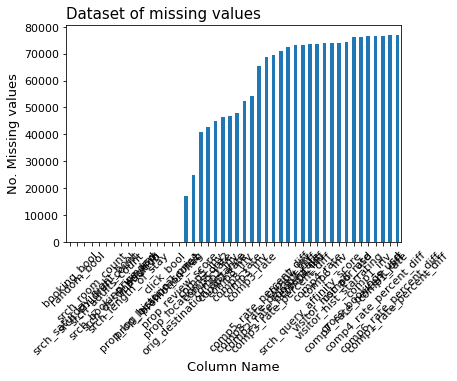

In [17]:
missing_values_plot(train, 'Dataset of missing values','Column Name','No. Missing values') 

In [18]:
# checking missing values per column 
train.visitor_hist_starrating.unique()


array([ nan, 4.31, 2.5 , 3.74, 3.35, 3.89, 3.38, 3.5 , 5.  , 2.57, 2.3 ,
       3.24, 3.26, 3.22, 3.72, 2.9 , 3.69, 3.  , 3.17, 3.75, 3.67, 2.94,
       4.94, 4.  , 4.33, 3.94, 3.92, 2.33, 4.2 , 3.99, 2.6 , 3.37, 3.51,
       2.75, 2.7 , 4.17, 2.63, 3.71, 3.95, 3.52, 2.21, 4.25, 3.59, 3.9 ,
       2.81, 2.67, 3.56, 4.07, 3.8 , 3.05, 2.  , 4.4 , 3.91, 2.72, 2.88,
       2.83, 2.69, 3.43, 3.06, 4.6 , 3.96, 3.49, 2.18, 2.45, 2.62, 4.06,
       4.5 , 3.2 , 2.43, 2.95, 3.1 , 3.28, 2.8 , 3.15, 3.16, 3.09, 3.65,
       2.87, 3.62, 4.11, 3.12, 3.76, 4.63, 3.08, 3.34, 2.31, 4.14, 4.02,
       3.44, 2.68, 3.82, 4.46, 4.3 , 1.67, 4.67, 3.61])

In [19]:
train.visitor_hist_adr_usd.unique()

array([   nan, 180.75, 270.08, 122.34, 210.6 , 229.18, 137.25, 206.02,
       334.43, 185.91, 122.51,  74.79, 127.82, 240.26, 203.77, 203.93,
       136.75, 100.54, 165.39, 146.56, 234.78, 117.91, 390.57, 322.81,
       120.46,  51.77, 150.93, 134.93, 372.84,  70.06, 246.15, 205.51,
       287.22, 100.08, 277.6 , 166.07,  93.  , 174.73, 412.23, 205.46,
        90.11, 137.58, 156.84, 143.83, 250.61, 435.92, 225.01,  84.89,
       136.18,  99.71, 243.66, 119.02, 179.54, 253.87, 151.68, 154.27,
       518.3 , 200.36, 184.42, 223.92, 189.89,  79.53, 416.01, 277.87,
        49.02, 281.29, 139.33, 226.55, 285.47, 197.86, 182.14, 284.91,
       124.69, 110.63, 129.37, 151.38, 220.86, 122.6 ,  95.19, 213.01,
       126.87, 140.59,  78.87, 288.29, 117.74, 326.92, 163.86, 252.18,
        78.83, 169.33,  85.31, 253.27, 111.2 , 222.91,  78.12, 691.75,
       236.3 , 119.34, 174.8 , 257.7 , 244.03, 151.25, 189.46, 136.27,
       215.83, 201.71, 126.81, 223.9 ,  97.55,  76.2 ,  36.91,  87.46,
      

In [20]:
# id of all countries involved in the data collection on hotel properties clicked or not by users 
# 219 id seems to be of interest since it counts the highest data values 
train.prop_country_id.value_counts().index

Int64Index([219, 100,  55,  31,  99, 129, 215, 220,  59,  98, 216, 158,  92,
            132, 205,  39, 117,  81,  15,  32, 103,  80, 138,  14, 109,  50,
              4,  73,  60,  35,  18, 181,  70,  56,  53,  26,  41, 221,   9,
            127, 137,  48,  23, 202, 178, 157, 211, 164, 225,  16, 154, 156,
            134,  13, 194, 212, 206,  61, 113,  33,  10,   2, 102, 195, 213,
            230,  30,  37, 182,  97,  71,  68,  88, 151, 159, 223, 189, 153,
            145,  77, 173, 131,  40, 185, 187, 119, 123, 106, 203,  86,  63,
            197,  83, 184,  91, 125, 152],
           dtype='int64')

In [21]:
# replacing all the NaN values containing columns with zeros 
train['visitor_hist_starrating'] = train['visitor_hist_starrating'].replace(np.NaN, 0)


In [22]:
# we can see that we replaced the NaN values with zero's 

train.visitor_hist_starrating.unique()

array([0.  , 4.31, 2.5 , 3.74, 3.35, 3.89, 3.38, 3.5 , 5.  , 2.57, 2.3 ,
       3.24, 3.26, 3.22, 3.72, 2.9 , 3.69, 3.  , 3.17, 3.75, 3.67, 2.94,
       4.94, 4.  , 4.33, 3.94, 3.92, 2.33, 4.2 , 3.99, 2.6 , 3.37, 3.51,
       2.75, 2.7 , 4.17, 2.63, 3.71, 3.95, 3.52, 2.21, 4.25, 3.59, 3.9 ,
       2.81, 2.67, 3.56, 4.07, 3.8 , 3.05, 2.  , 4.4 , 3.91, 2.72, 2.88,
       2.83, 2.69, 3.43, 3.06, 4.6 , 3.96, 3.49, 2.18, 2.45, 2.62, 4.06,
       4.5 , 3.2 , 2.43, 2.95, 3.1 , 3.28, 2.8 , 3.15, 3.16, 3.09, 3.65,
       2.87, 3.62, 4.11, 3.12, 3.76, 4.63, 3.08, 3.34, 2.31, 4.14, 4.02,
       3.44, 2.68, 3.82, 4.46, 4.3 , 1.67, 4.67, 3.61])

In [23]:
# SO now all the columns with NaN will be replaced with zeros 

train['visitor_hist_adr_usd'] = train['visitor_hist_adr_usd'].replace(np.NaN, 0)       
train['prop_review_score'] = train['prop_review_score'].replace(np.NaN, 0)                
train['prop_location_score2'] = train['prop_location_score2'].replace(np.NaN, 0)           
train['srch_query_affinity_score']   = train['srch_query_affinity_score'].replace(np.NaN, 0)
train['orig_destination_distance'] = train['orig_destination_distance'].replace(np.NaN, 0)    
train['comp1_rate'] = train['comp1_rate'].replace(np.NaN, 0)                   
train['comp1_inv'] = train['comp1_inv'].replace(np.NaN, 0)                    
train['comp1_rate_percent_diff'] = train['comp1_rate_percent_diff'].replace(np.NaN, 0)      
train['comp2_rate'] = train['comp2_rate'].replace(np.NaN, 0)                   
train['comp2_inv'] = train['comp2_inv']                    
train['comp2_rate_percent_diff'] = train['comp2_rate_percent_diff'].replace(np.NaN, 0)
train['comp3_rate'] = train['comp3_rate'].replace(np.NaN, 0)
train['comp3_inv'] = train['comp3_inv'].replace(np.NaN, 0)              
train['comp3_rate_percent_diff'] = train['comp3_rate_percent_diff'].replace(np.NaN, 0) 
train['comp4_rate'] = train['comp4_rate'].replace(np.NaN, 0)        
train['comp4_inv'] = train['comp4_inv'].replace(np.NaN, 0)        
train['comp4_rate_percent_diff'] = train['comp4_rate_percent_diff'].replace(np.NaN, 0)      
train['comp5_rate'] = train['comp5_rate'].replace(np.NaN, 0)               
train['comp5_inv'] = train['comp5_inv'].replace(np.NaN, 0)                    
train['comp5_rate_percent_diff'] = train['comp5_rate_percent_diff'].replace(np.NaN, 0)  
train['comp6_rate'] = train['comp6_rate'].replace(np.NaN, 0)
train['comp6_inv'] = train['comp6_inv'].replace(np.NaN, 0)
train['comp6_rate_percent_diff'] = train['comp6_rate_percent_diff'].replace(np.NaN, 0)
train['comp7_rate'] = train['comp7_rate'].replace(np.NaN, 0)                   
train['comp7_inv'] = train['comp7_inv'].replace(np.NaN, 0)                    
train['comp7_rate_percent_diff'] = train['comp7_rate_percent_diff'].replace(np.NaN, 0)      
train['comp8_rate'] = train['comp8_rate'].replace(np.NaN, 0)                   
train['comp8_inv'] = train['comp8_inv'].replace(np.NaN, 0)                   
train['comp8_rate_percent_diff'] = train['comp8_rate_percent_diff'].replace(np.NaN, 0)      
train['gross_bookings_usd'] = train['gross_bookings_usd'].replace(np.NaN, 0)

In [24]:
# an extra check on one of the columns containing NaN values to see if the c\olumn is replaced with zero 

train.gross_bookings_usd.unique()  


array([  0.  , 114.29, 162.38, ..., 489.31, 374.29, 659.61])

In [25]:
# see which features are present and may be of importance 

train.columns 

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [26]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,27348,2,4.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0.0,0.0,0.0
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78489,5251,2013-06-10 14:57:26,15,55,0.0,0.0,55,28662,3,3.5,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
78490,5251,2013-06-10 14:57:26,15,55,0.0,0.0,55,48394,3,3.5,...,25.0,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
78491,5251,2013-06-10 14:57:26,15,55,0.0,0.0,55,55272,4,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78492,5251,2013-06-10 14:57:26,15,55,0.0,0.0,55,69549,4,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
train.srch_destination_id.value_counts()

8192.0     1169
4562.0      904
9402.0      708
10979.0     616
18774.0     563
           ... 
21489.0       5
22455.0       5
19143.0       5
23491.0       5
23180.0       5
Name: srch_destination_id, Length: 1770, dtype: int64

In [28]:

train.groupby('visitor_location_country_id').size().nlargest(5)
#we can see that label 219 is largest country of visitors. As ease to computational power we can select the country which 
# is mostly visited and not running all the countries 

visitor_location_country_id
219    45880
100     7894
55      4741
216     3561
220     2865
dtype: int64

In [29]:
# we select us as country to test our prediction on since it has the most visitors 

us = train.loc[train['visitor_location_country_id'] == 219]  
us = us.sample(frac=0.6, random_state=99) 


In [30]:
us.shape


(27528, 54)

In [31]:
# taking the sum of countries containing zero values 

us.isnull().sum()


srch_id                            0
date_time                          0
site_id                            0
visitor_location_country_id        0
visitor_hist_starrating            0
visitor_hist_adr_usd               0
prop_country_id                    0
prop_id                            0
prop_starrating                    0
prop_review_score                  0
prop_brand_bool                    0
prop_location_score1               0
prop_location_score2               0
prop_log_historical_price          0
position                           0
price_usd                          0
promotion_flag                     0
srch_destination_id                0
srch_length_of_stay                0
srch_booking_window                0
srch_adults_count                  0
srch_children_count                0
srch_room_count                    0
srch_saturday_night_bool           0
srch_query_affinity_score          0
orig_destination_distance          0
random_bool                        0
c

In [32]:
# the NaN containing features were changed to null, but since not all features really make sense for using it 
# changing every null containing feature to zero does not make sense 
# so therefore using a drop function to eliminate the features that are not of essential contribution to the likelihood 
# prediction will be removed 
# we'll remove some of the features we think is not that of importance 

dropping_cols = ['date_time', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv', 'gross_bookings_usd', 'srch_id', 'prop_id']
us.drop(dropping_cols, axis=1, inplace=True)


In [33]:
# now we have selected the important features for research and also converted all the NaN values to zeros 
us.isnull().sum()

site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
click_bool                     0
booking_bool                   0
dtype: int64

In [34]:
# we see that we have a huge amount of data in rows and 23 columns 
# this should be sufficient to classifier and run prediction on its ranking 
us.shape

(27528, 23)

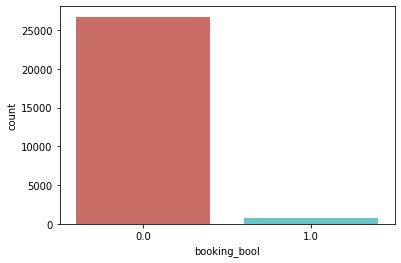

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='booking_bool',data=us, palette='hls')
plt.show();

# when we look at the booking boolean we see that there is a expontential difference in booking and not booking; with 
# not clicking into exponential favor 



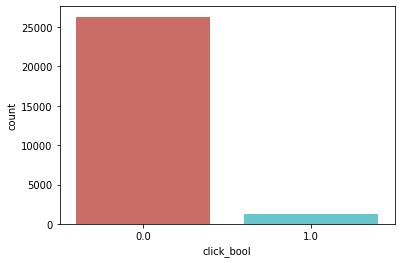

In [36]:

sns.countplot(x='click_bool',data=us, palette='hls')
plt.show(); 

# we can also see that the click boolean shows a significant value of 0 which means there is a significant choice appearing 
# in not clicking on a hotel 

([<matplotlib.patches.Wedge at 0x7fe48f363410>,
 [Text(-0.28860434325260853, 1.0614648053778, '219'),
  Text(-0.7285446470967902, -0.8241496812998315, '100'),
  Text(-0.23812761383455436, -1.0739158437836094, '55'),
  Text(0.12520142279381208, -1.0928515927290425, '216'),
  Text(0.3990654874022891, -1.0250593820673872, '220'),
  Text(0.5855788500538465, -0.931180653992347, '129'),
  Text(0.7147226542635796, -0.8361647729260208, '31'),
  Text(0.7975294488806725, -0.7575927521881997, '59'),
  Text(0.8459257107773197, -0.7031427250892146, '99'),
  Text(0.885441542539399, -0.6526816028857025, '158'),
  Text(0.9173620812497315, -0.6069981975963036, '103'),
  Text(0.9452208532957139, -0.562634462590875, '92'),
  Text(0.9664302186506953, -0.5253690440811768, '50'),
  Text(0.981444844903958, -0.49675548956347326, '39'),
  Text(0.9930708828544389, -0.47308585016538524, '205'),
  Text(1.0033878003984686, -0.45079143959432405, '132'),
  Text(1.0131357082172303, -0.428434401904389, '215'),
  Text(

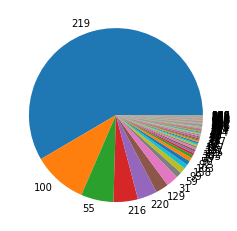

In [37]:
# exploring some other features to see how they look 
# well look into relationships  
country_names = train.visitor_location_country_id.value_counts().index
country_val = train.visitor_location_country_id.value_counts().values 
plt.pie(country_val, labels= country_names) 

([<matplotlib.patches.Wedge at 0x7fe48f1bd950>,
 [Text(-0.856465683103975, 0.6902655530049588, '219'),
  Text(0.6550624122731653, -0.8836816372579335, '100'),
  Text(1.0645576939036296, -0.2769781874996409, '55')])

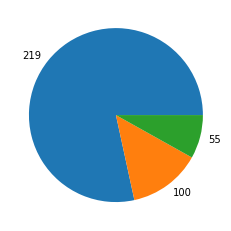

In [38]:
# data is overhelmed so i wil reduce it to 3 most important countries involved  
# we see that country id 219 is most apparing country 
# we will continue with country id 219 

plt.pie(country_val[:3], labels= country_names[:3]) 

([<matplotlib.patches.Wedge at 0x7fe48f187690>,
 [Text(-0.856465683103975, 0.6902655530049588, '219'),
  Text(0.6550624122731653, -0.8836816372579335, '100'),
  Text(1.0645576939036296, -0.2769781874996409, '55')],
 [Text(-0.4671630998748954, 0.37650848345725024, '78.41%'),
  Text(0.35730677033081737, -0.4820081657770546, '13.49%'),
  Text(0.5806678330383434, -0.15107901136344049, '8.10%')])

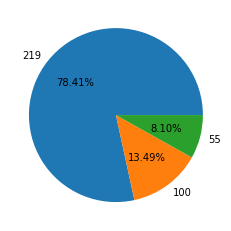

In [39]:
# we'll execute percentage of the pie  
                    
                    
plt.pie(country_val[:3], labels= country_names[:3], autopct='%.2f%%')  

# so we see a 78.63% of the visitor location country id 219 
# so this mean that 78.63 % of the online visitors have chosen to look at id country 219 which is US 
# this makes it more interesting to select US id 219 to further EDA exploration 

Observation: The highest record of visiting country is visitor location country id 219 

In [40]:
us.columns

Index(['site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool'],
      dtype='object')

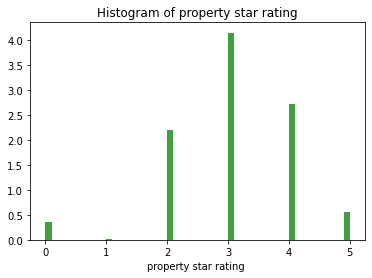

In [41]:
 


# the histogram of property star rating 
n, bins, patches = plt.hist(us.prop_starrating, 50, density=1, facecolor='g', alpha=0.75) 
plt.xlabel('property star rating ') 
plt.title('Histogram of property star rating') 
plt.show()

Most given star rate is 3 

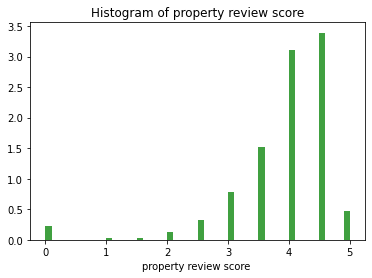

In [42]:
# take a look into the review score in us  

# the histogram of property review score  
n, bins, patches = plt.hist(us.prop_review_score, 50, density=1, facecolor='g', alpha=0.75) 
plt.xlabel('property review score ') 
plt.title('Histogram of property review score') 
plt.show()

The highest review score is 4.5

In [43]:
us.groupby(['srch_length_of_stay']).size().nlargest(5)

srch_length_of_stay
1.0    12917
2.0     6959
3.0     3881
4.0     1577
5.0     1034
dtype: int64

No outliers to be seen here 

In [44]:
us.groupby('srch_length_of_stay')['price_usd'].size().nlargest(5)


srch_length_of_stay
1.0    12917
2.0     6959
3.0     3881
4.0     1577
5.0     1034
Name: price_usd, dtype: int64

we can see that the length of stay decreases as the price increases 

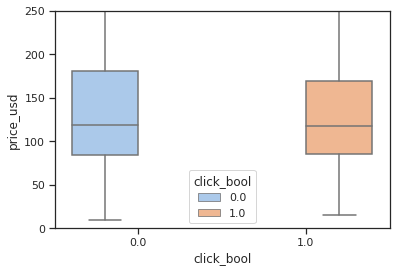

In [45]:
sns.set(style="ticks", palette="pastel")

ax = sns.boxplot(x="click_bool", y="price_usd", hue="click_bool", data=us)
ax.set_ylim([0, 250]);

In [46]:
us.groupby('click_bool')['price_usd'].describe() 

,count,mean,std,min,25%,50%,75%,max
click_bool,,,,,,,,
0.0,26304.0,229.102638,3513.728645,10.0,84.0,119.0,181.0575,250892.0
1.0,1224.0,269.737974,4442.569670,15.0,85.0,118.0,169.0000,155531.0


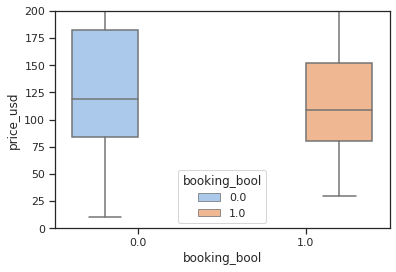

In [47]:
sns.set(style="ticks", palette="pastel")

ax = sns.boxplot(x="booking_bool", y="price_usd", hue="booking_bool", data=us)
ax.set_ylim([0, 200]);

In [48]:
# no strings to be observed in us country features 
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27528 entries, 54690 to 12443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site_id                      27528 non-null  int64  
 1   visitor_location_country_id  27528 non-null  int64  
 2   prop_country_id              27528 non-null  int64  
 3   prop_starrating              27528 non-null  int64  
 4   prop_review_score            27528 non-null  float64
 5   prop_brand_bool              27528 non-null  int64  
 6   prop_location_score1         27528 non-null  float64
 7   prop_location_score2         27528 non-null  float64
 8   prop_log_historical_price    27528 non-null  float64
 9   position                     27528 non-null  float64
 10  price_usd                    27528 non-null  float64
 11  promotion_flag               27528 non-null  float64
 12  srch_destination_id          27528 non-null  float64
 13  srch_length_

In [49]:
us.groupby('booking_bool')['price_usd'].describe() 

,count,mean,std,min,25%,50%,75%,max
booking_bool,,,,,,,,
0.0,26745.0,228.175926,3484.685508,10.0,84.0,119.0,182.0,250892.0
1.0,783.0,324.278301,5554.164356,30.0,80.0,109.0,152.0,155531.0


Looking at the mean  of booking_bool and clicking_bool , they both show that the average for booking or clicking is lower 
than not booking or clicking on a hotel property when compared against prices. 


# correlation by heatmap

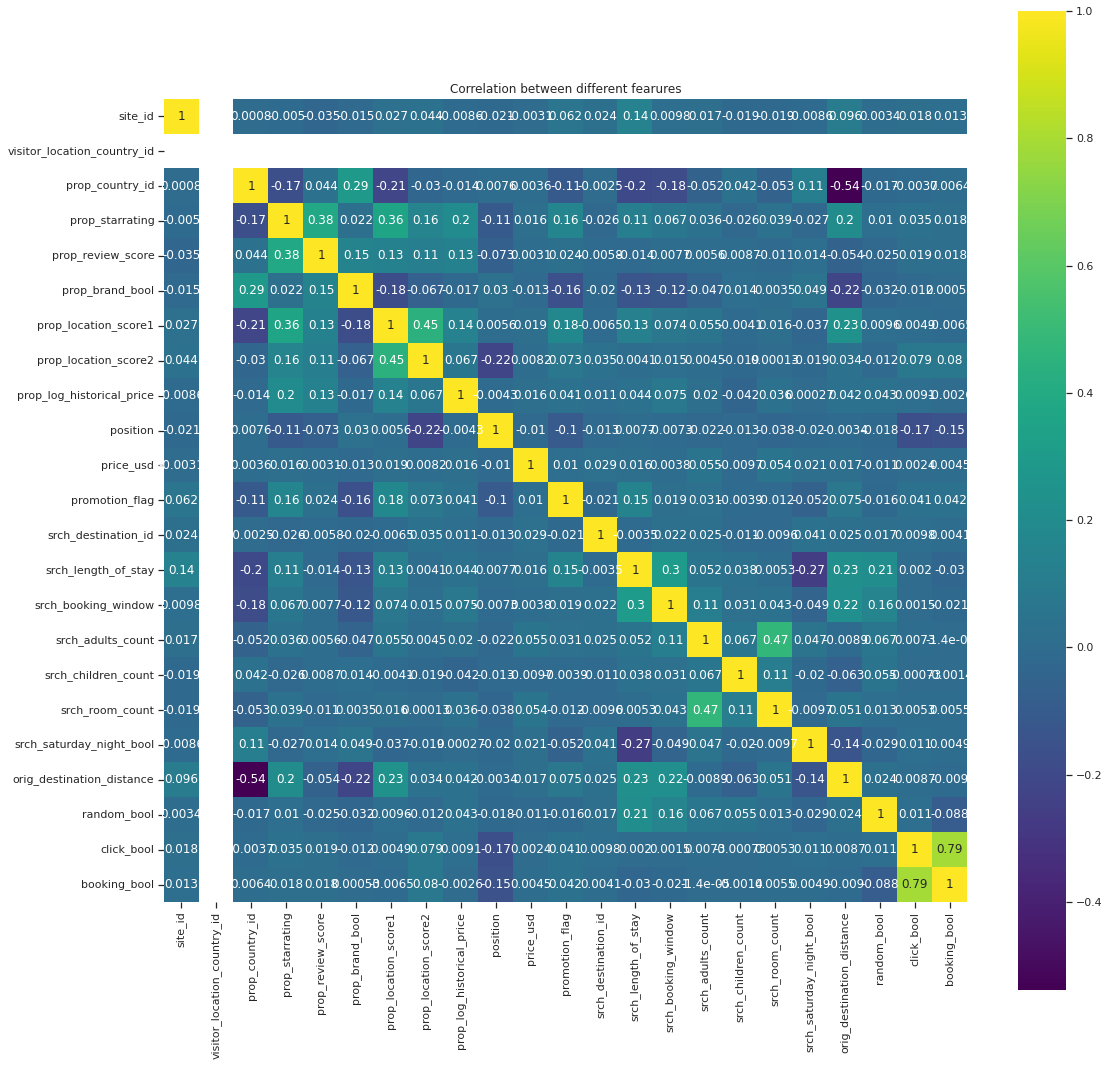

In [50]:
correlation = us.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures');  



observation: there are no features that are correlated to each other in positive or negative correlative way 

In [51]:

#import xgboost as xgb

#from sklearn.metrics import mean_squared_error 

# separating target variable of the rest variables using .iloc to subset data 
# the target column is the last column which is the booking boolean, therefore we will separate the booking_bool as target 
# from the rest of the dataframe columns by using -1 in the iloc as variable y as predictor 
# we want to predict the boolean of booking 

#X, y = us.iloc[:, :-1], us.iloc[:, -1]

In [52]:
from sklearn.model_selection import train_test_split  

X, y = us.iloc[:, :-1], us.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
y.head()

54690    0.0
59349    0.0
61146    0.0
35003    0.0
66794    0.0
Name: booking_bool, dtype: float64

In [54]:
X_train

,site_id,visitor_location_country_id,prop_country_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool
24344,5,219,219,3,4.0,1,2.08,0.0075,5.39,26.0,...,23345.0,1.0,8.0,1.0,0.0,1.0,1.0,165.99,0.0,0.0
40416,5,219,219,2,3.5,1,2.30,0.0375,0.00,7.0,...,23435.0,1.0,3.0,1.0,0.0,1.0,0.0,156.53,0.0,0.0
37944,5,219,219,3,3.0,1,0.69,0.0505,5.05,7.0,...,23100.0,8.0,30.0,1.0,0.0,1.0,0.0,557.49,0.0,0.0
58879,5,219,219,3,4.5,0,4.13,0.0430,5.39,25.0,...,13216.0,3.0,36.0,2.0,2.0,1.0,1.0,420.66,0.0,0.0
78200,5,219,219,2,4.0,1,2.20,0.0299,4.25,28.0,...,22434.0,1.0,1.0,2.0,0.0,1.0,1.0,36.81,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26144,5,219,219,3,4.5,1,3.04,0.2406,4.61,22.0,...,2323.0,1.0,15.0,2.0,0.0,1.0,0.0,115.63,0.0,0.0
12319,5,219,219,4,4.5,1,2.89,0.1044,4.86,4.0,...,6296.0,1.0,2.0,1.0,0.0,1.0,0.0,162.71,0.0,0.0
17806,5,219,219,4,4.0,1,3.87,0.1922,5.13,4.0,...,4600.0,4.0,74.0,4.0,0.0,4.0,0.0,969.64,0.0,1.0
14925,5,219,219,3,3.5,1,0.69,0.0043,4.65,35.0,...,26065.0,1.0,25.0,2.0,0.0,1.0,1.0,60.78,0.0,0.0


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier() 

In [56]:
# hyperparameters 

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] 
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [57]:
# randomized Search CV 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] 
# number of features consider at every split 
max_features = ['auto', 'sqrt'] 
# maximum number of levels in tree 
max_depth = [int(x) for x in np.linspace(5, 30, num=6)] 
#max_depth.append(None) 
# minimum number of samples required to split node 
min_samples_split = [2, 5, 10, 15, 100] 
# minimum number of samples required at each leaf node 
min_samples_leaf = [1, 2, 5, 10] 


In [58]:
from sklearn.model_selection import RandomizedSearchCV


In [59]:
# create random grid 

random_grid = {'n_estimators': n_estimators, 
              'max_features': max_features, 
              'max_depth': max_depth, 
              'min_samples_split': min_samples_split, 
              'min_samples_leaf': min_samples_leaf} 

print(random_grid) 

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [60]:
# using random grid for best hyperparameters 
# tuning creating base model 
rf = RandomForestClassifier()


In [61]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv=5, verbose=2, random_state=42,  n_jobs=1)

In [62]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
predictions=rf_random.predict(X_test)

In [64]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


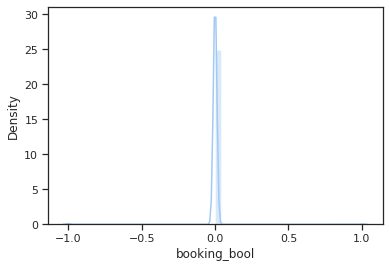

In [65]:
sns.distplot(y_test-predictions) # very good results given by the model

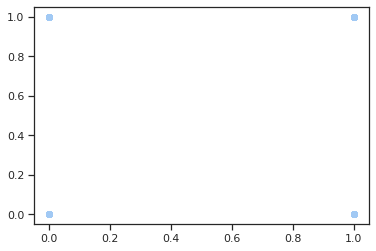

In [66]:
plt.scatter(y_test, predictions) # no linear relationship so model is not good  

In [ ]:
xg_clas = xgb.XGBClassifier(objective='clas:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10) 


AttributeError: module 'xgboost' has no attribute 'XGBClassifier'

In [ ]:
us.srch_length_of_stay



2878339    1
3662867    7
113195     7
703324     1
1248338    2
          ..
4471839    1
1825876    1
140777     3
3645860    1
2925222    4
Name: srch_length_of_stay, Length: 1735493, dtype: int64

In [ ]:
import numpy as np


booking_indices = us[us.booking_bool == 1].index
random_indices  = np.random.choice(booking_indices, len(us.loc[us.booking_bool ==1]), replace=False)  
booking_sample = us.loc[random_indices]  
                                   
                                   
not_booked = us[us.booking_bool ==0].index 
random_indices  = np.random.choice(booking_indices, sum(us['booking_bool']), replace = False)  
not_booked_sample = us.loc[random_indices] 
                                   
                                   
us_new = pd.concat([booking_sample, not_booked_sample], axis=0)

                        
                                   
                                
  

print("Percentage of not click impressions: ", len(us_new[us_new.booking_bool == 0])/len(us_new))
print("Percentage of click impression: ", len(us_new[us_new.booking_bool == 1])/len(us_new))
print("Total number of records in resampled data: ", len(us_new))

Percentage of not click impressions:  0.0
Percentage of click impression:  1.0
Total number of records in resampled data:  98108


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# MinMax=MinMaxScaler()
# df['price_usd']=MinMax.fit_transform(df['price_usd'].values.reshape(-1,1)) 


mms = MinMaxScaler()
us_new[['price_usd','orig_destination_distance']] = mms.fit_transform(us_new[['price_usd','orig_destination_distance']])

In [ ]:



X_train,X_test,y_train,y_test = train_test_split(X,Y1,test_size=0.3,random_state=1)


In [ ]:
rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3) 
classifier_name = 'RandomForest'

rf

RandomForestClassifier(min_samples_leaf=5, min_samples_split=3, n_estimators=51)

In [ ]:
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X_test)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")

In [ ]:
rf.fit(X_train,y_train)
print_evaluation_metrics(rf,classifier_name,X_test,y_test)

--------- Model :  RandomForest  ---------------

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     29433

    accuracy                           1.00     29433
   macro avg       1.00      1.00      1.00     29433
weighted avg       1.00      1.00      1.00     29433

Accuracy Score :  1.0
---------------------------------------



In [ ]:
there is a accuracy on the f score of 1 which does not make sense. So the use of booking in the training is not 

In [ ]:
np.isnan(np.sum(X))


site_id                        False
visitor_location_country_id    False
prop_country_id                False
prop_starrating                False
prop_review_score              False
prop_brand_bool                False
prop_location_score1           False
prop_location_score2           False
prop_log_historical_price      False
position                       False
price_usd                      False
promotion_flag                 False
srch_destination_id            False
srch_length_of_stay            False
srch_booking_window            False
srch_adults_count              False
srch_children_count            False
srch_room_count                False
srch_saturday_night_bool       False
orig_destination_distance      False
random_bool                    False
click_bool                     False
booking_bool                   False
dtype: bool

In [ ]:
us.groupby('prop_brand_bool').size()


prop_brand_bool
0     463065
1    1272428
dtype: int64

we can see that more than 73 % is from property brands 

In [ ]:
us.groupby('price_usd')['click_bool'].size()


price_usd
0.05          1
0.06          4
0.07          3
0.08         12
0.09          8
             ..
353129.00     1
411802.00     1
423917.00     1
538065.00     1
722556.00     1
Name: click_bool, Length: 15895, dtype: int64

In [ ]:
us.groupby(['price_usd', 'booking_bool', 'click_bool']).size()


price_usd  booking_bool  click_bool
0.05       0             0              1
0.06       0             0              3
           1             1              1
0.07       0             0              3
0.08       0             0             12
                                       ..
353129.00  0             0              1
411802.00  0             0              1
423917.00  0             0              1
538065.00  0             0              1
722556.00  0             0              1
Length: 17848, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification  
from sklearn import metrics 


X, y = make_classification(n_samples=1000, n_features=5,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0, 0]]))


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification  
from sklearn import metrics 

X, y = make_classification(n_samples = 51, n_features = 5,  n_sample_split = 3)

classifier = RandomForestClassifier(max_depth=2)

def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")
    

classifier_list, classifier_name_list = get_ensemble_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

classifier.fit(X,y) 
print()


rf = RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
rf.fit(X_train, y_train)
(pd.Series(rf.feature_importances_, index=us_new.columns).plot(kind='barh'))




TypeError: 'method' object is not subscriptable

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier


def get_ensemble_models():
    rf =RandomForestClassifier(n_estimators=51,min_samples_leaf=5,min_samples_split=3)
    bagg = BaggingClassifier(n_estimators=51,random_state=42)
    extra = ExtraTreesClassifier(n_estimators=51,random_state=42)
    ada = AdaBoostClassifier(n_estimators=51,random_state=42)
    grad = GradientBoostingClassifier(n_estimators=51,random_state=42)
    classifier_list = [rf,bagg,extra,ada,grad]
    classifier_name_list = ['Random Forests','Bagging','Extra Trees','AdaBoost','Gradient Boost']
    return classifier_list,classifier_name_list
    
def print_evaluation_metrics(trained_model,trained_model_name,X_test,y_test):
    print('--------- Model : ', trained_model_name, ' ---------------\n')
    predicted_values = trained_model.predict(X_test)
    print(metrics.classification_report(y_test,predicted_values))
    print("Accuracy Score : ",metrics.accuracy_score(y_test,predicted_values))
    print("---------------------------------------\n")
    
classifier_list, classifier_name_list = get_ensemble_models()
for classifier,classifier_name in zip(classifier_list,classifier_name_list):
    classifier.fit(X_train,y_train)
    print_evaluation_metrics(classifier,classifier_name,X_test,y_test)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification 

# were interested in the bookings, property review score and visitor_hist_adr_usd 
X = train['gross_bookings_usd', 'prop_review_score', 'visitor_hist_adr_usd'] 
y = train[]
>>> X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = AdaBoostClassifier(n_estimators=100, random_state=0)
>>> clf.fit(X, y)
AdaBoostClassifier(n_estimators=100, random_state=0)
>>> clf.predict([[0, 0, 0, 0]])
array([1])
>>> clf.score(X, y)

SyntaxError: invalid syntax (Temp/ipykernel_24732/267590177.py, line 1)

In [ ]:
# data_time seems to be surrounded by quotation marks 
from datetime import datetime  







df = pd.to_datetime(train.date_time, format='mm') 
print(df)


Series([], Name: date_time, dtype: datetime64[ns])


In [ ]:
# replacing the non numerical values for numerical values , as a preparation for building a model in later stage 
# we can see that the following features consist of NaN values which need to be replaced for numeric value 
#(visitor_hist_starrating, visitor_hist_adr_usd  ,  comp6_rate_percent_diff , comp7_rate , comp7_inv, comp7_rate_percent_diff  
# comp8_rate, comp8_inv, comp8_rate_percent_diff, gross_bookings_usd        ) 


#train[['visitor_hist_starrating', 'visitor_hist_adr_usd', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv'
#, 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'gross_bookings_usd']] = train[['visitor_hist_starrating', 'visitor_hist_adr_usd', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv'
#, 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'gross_bookings_usd']].replace(0, np.NaN)


#print(train)  

df["MasVnrArea"] = df["MasVnrArea"].replace(np.nan, 0)

train['visitor_hist_starrating'] = train['visitor_hist_starrating'].replace(np.NaN, 0)

train[['id', 'visitor_hist_starrating  ']]  = train[['id', 'visitor_hist_starrating  ']].replace(0, np.NaN) 
print(train)

KeyError: "None of [Index(['id', 'visitor_hist_starrating  '], dtype='object')] are in the [columns]"